<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Segmentación de Clientes con Clustering Jerárquico y DBSCAN

El objetivo de este caso-taller es analizar una base de datos ficticia sobre clientes de una tienda y buscar encontrar grupos de clientes que permitan generar estrategias de marketing focalizadas. La base se encuentra en los `Archivos de Laboratorio` en la carpeta `data` y cuenta con 200 observaciones y 5 variables:

- `Id_Cliente`: identificador de cliente.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta `data` se encuentra el archivo `datos_clientes.csv` cargue estos datos en su *cuaderno*. 

In [1]:
# Utilice este espacio para escribir el código.

import pandas as pd

# Se cargan los datos
df = pd.read_csv('data/datos_clientes.csv')

df

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto
0,1,Mujer,41,98115.05,39
1,2,Mujer,20,35458.14,75
2,3,Mujer,68,59872.08,55
3,4,Hombre,63,48508.93,51
4,5,Mujer,31,44431.11,54
...,...,...,...,...,...
195,196,Mujer,30,19322.17,72
196,197,Mujer,50,43486.37,45
197,198,Hombre,35,24086.95,35
198,199,Mujer,24,38599.28,65


### 2. Análisis preliminar. 

Antes de comenzar el análisis de segmentación utilice estadísticas descriptivas para explorar la variables que se encuentran en los datos. En su análisis mencione si hay patrones que surgen del examen descriptivo de los datos; entre ellos si hay diferencias en los ingresos y los puntajes de gastos para mujeres y hombres, por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+), y por grupos etarios y género. Discuta además si estas diferencias son estadísticamente significativas.

Genero            object
Edad               int64
Ingreso          float64
Puntaje_Gasto      int64
dtype: object
             Edad        Ingreso  Puntaje_Gasto
count  200.000000     200.000000     200.000000
mean    38.850000   60624.446600      50.200000
std     13.969007   26262.903416      25.823522
min     18.000000   13458.020000       1.000000
25%     28.750000   41512.787500      34.750000
50%     36.000000   60777.960000      50.000000
75%     49.000000   77143.865000      73.000000
max     70.000000  138584.520000      99.000000
Mujer     112
Hombre     88
Name: Genero, dtype: int64


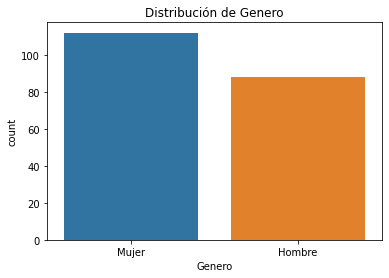

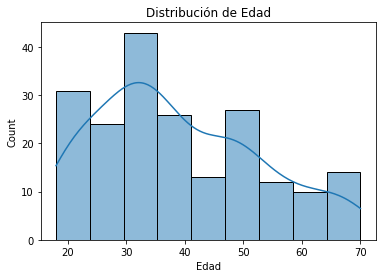

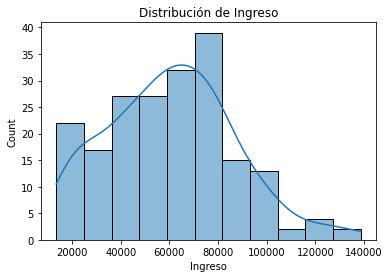

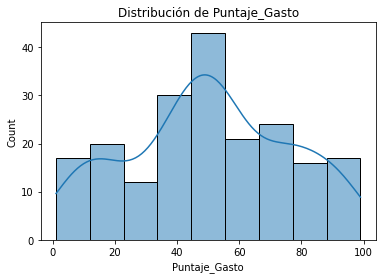

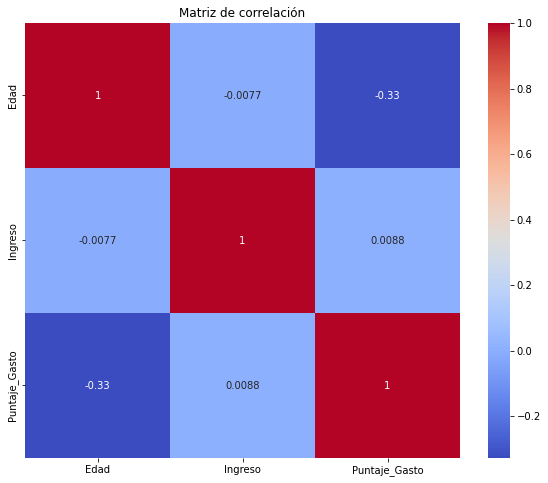

In [2]:
# Utilice este espacio para escribir el código.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df.set_index('Id_Cliente', inplace=True)

# Se muestra el tipo de dato de cada variable
print(df.dtypes)

# Se muestran estadísticas descriptivas para variables numéricas
print(df.describe())

# Se muestra frecuencia de categorías para variables categóricas
for col in df.select_dtypes(include=['object']):
    print(df[col].value_counts())
    
# A continuación se realizae el análisis de segmentación
# Segmentación por variables categóricas
for col in df.select_dtypes(include=['object']):
    sns.countplot(x=col, data=df)
    plt.title(f'Distribución de {col}')
    plt.show()

# Segmentación por variables numéricas
for col in df.select_dtypes(include=['int64', 'float64']):
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()
    
# A continuación se muestra la correlación entre variables numéricas
# Se calcula la matriz de correlación
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Se visualiza la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de correlación')
plt.show()


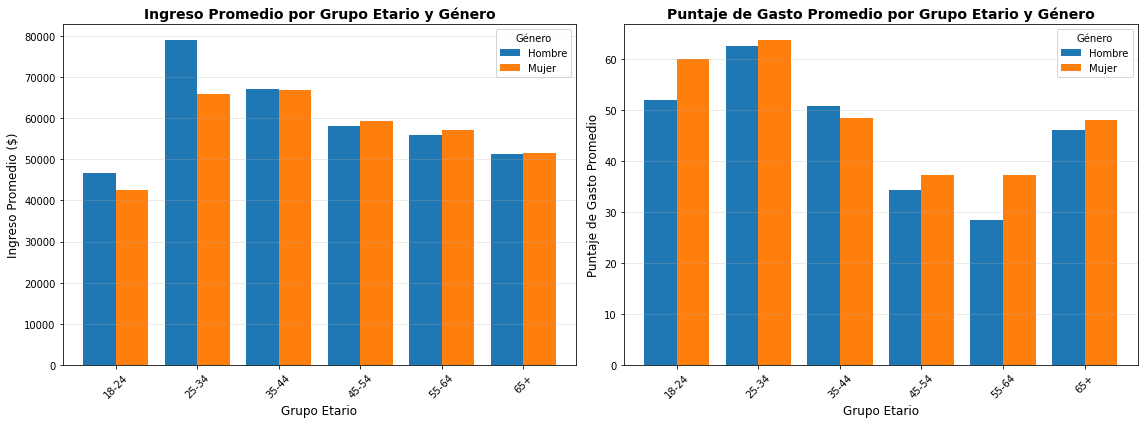

Ingreso Promedio por Grupo Etario y Género:
Genero          Hombre     Mujer
Grupo_Etario                    
18-24         46748.48  42523.27
25-34         78927.43  65815.38
35-44         67001.99  66923.43
45-54         58029.13  59210.61
55-64         55780.23  57098.78
65+           51366.81  51517.96

Puntaje de Gasto Promedio por Grupo Etario y Género:
Genero        Hombre  Mujer
Grupo_Etario               
18-24          51.88  59.95
25-34          62.45  63.66
35-44          50.78  48.42
45-54          34.36  37.28
55-64          28.44  37.29
65+            46.00  48.00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# De acuerdo al enunciado a continuación se crear lo grupos etarios solicitados por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+)
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Grupo_Etario'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

# Se calculan los promedios por grupo etario y género
ingreso_promedio = df.groupby(['Grupo_Etario', 'Genero'])['Ingreso'].mean().unstack()
gasto_promedio = df.groupby(['Grupo_Etario', 'Genero'])['Puntaje_Gasto'].mean().unstack()

# Se crear la figura para presentar las dos gráficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Primera gráfica: Ingreso promedio por grupo etario y género
ingreso_promedio.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Ingreso Promedio por Grupo Etario y Género', fontsize=14, fontweight='bold')
ax1.set_xlabel('Grupo Etario', fontsize=12)
ax1.set_ylabel('Ingreso Promedio ($)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Género')
ax1.grid(axis='y', alpha=0.3)

# Segunda gráfica: Puntaje de gasto promedio por grupo etario y género
gasto_promedio.plot(kind='bar', ax=ax2, width=0.8)
ax2.set_title('Puntaje de Gasto Promedio por Grupo Etario y Género', fontsize=14, fontweight='bold')
ax2.set_xlabel('Grupo Etario', fontsize=12)
ax2.set_ylabel('Puntaje de Gasto Promedio', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Género')
ax2.grid(axis='y', alpha=0.3)

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

# Se muestran los datos agrupados en tabla
print("Ingreso Promedio por Grupo Etario y Género:")
print(ingreso_promedio.round(2))
print("\nPuntaje de Gasto Promedio por Grupo Etario y Género:")
print(gasto_promedio.round(2))

In [7]:
from scipy import stats

# Para concluir si las diferencias son estadísticamente significativas se define una función para calcular el p-value y concluya si es mayor o mo a 0,05.

def pvalues(df, variable):
    print(f"P-VALUES PARA {variable.upper()}:")
    print("Grupo Etario\tp-value\t\tSignificativo")
    print("-" * 40)
    
    for grupo in df['Grupo_Etario'].unique():
        grupo_data = df[df['Grupo_Etario'] == grupo]
        hombres = grupo_data[grupo_data['Genero'] == 'Hombre'][variable]
        mujeres = grupo_data[grupo_data['Genero'] == 'Mujer'][variable]
        
        _, p_value = stats.ttest_ind(hombres, mujeres, nan_policy='omit')
        signo = "SÍ" if p_value < 0.05 else "NO"
        
        print(f"{grupo}\t\t{p_value:.4f}\t\t{signo}")

pvalues(df, 'Ingreso')
print()
pvalues(df, 'Puntaje_Gasto')

P-VALUES PARA INGRESO:
Grupo Etario	p-value		Significativo
----------------------------------------
35-44		0.9929		NO
18-24		0.5491		NO
65+		0.9840		NO
55-64		0.9115		NO
25-34		0.0897		NO
45-54		0.8864		NO

P-VALUES PARA PUNTAJE_GASTO:
Grupo Etario	p-value		Significativo
----------------------------------------
35-44		0.8086		NO
18-24		0.3422		NO
65+		0.7674		NO
55-64		0.4390		NO
25-34		0.8602		NO
45-54		0.5970		NO


(Utilice este espacio para describir su procedimiento)

p-value < 0.05: Diferencia estadísticamente significativa

p-value ≥ 0.05: No hay diferencia significativa

El análisis descriptivo reveló que no existen diferencias estadísticamente significativas en ingresos o puntajes de gasto entre hombres y mujeres dentro de los mismos grupos etarios. Aunque visualmente se observan variaciones en algunos casos en las gráficas de barras, los valores-p obtenidos mediante pruebas t superaron consistentemente el umbral de 0.05. Esto sugiere que, desde una perspectiva estadística, el género no es un factor determinante en el comportamiento de gasto o nivel de ingresos en esta muestra. Respecto al resto de información analizada, sí se observaron tendencias en terminos de los grupos más jóvenes (25-34) muestran los mayores ingresos y puntajes de gasto, mientras que los grupos de 45 a 64 años presentan valores más bajos, lo que podría indicar diferentes prioridades financieras o etapas de vida.

En total la población esta entre los 30 y 40 años, con ingresos medios entre 60.000 y 70.000 y un puntaje de gasto del 50. La mayoria de la población de la muestra son mujeres. 


### 3. Clustering Jerárquico

#### 3.1. Dendrogramas

Agrupe a los clientes utilizando sólo dos variables: su ingreso y el puntaje de gastos. Para ello retenga estas dos variables, estandarízelas, construya y grafique un dendograma. Para la construcción del dendrograma utilice el enlace 'ward' y la distancia euclidiana. Explique la importancia de estandarizar los datos.

In [4]:
# Utilice este espacio para escribir el código.

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Se define un nuevo df solo con ingreso y puntaje gasto
nuevo_df = df[['Ingreso', 'Puntaje_Gasto']]

nuevo_df

# Se procede a estandarizar las variables
scaler = StandardScaler()
nuevo_df_escalado = scaler.fit_transform(nuevo_df)


# Se convierte el objeto de array a data frame para manipulación posterior
nuevo_df_escalado = pd.DataFrame(nuevo_df_escalado, columns=['ingreso_escalado', 'puntaje_de_gasto_escalado'])
nuevo_df_escalado

,ingreso_escalado,puntaje_de_gasto_escalado
0,1.431094,-0.434801
1,-0.960650,0.962775
2,-0.028719,0.186343
3,-0.462474,0.031057
4,-0.618133,0.147522
...,...,...
195,-1.576593,0.846310
196,-0.654196,-0.201872
197,-1.394712,-0.590088
198,-0.840746,0.574559


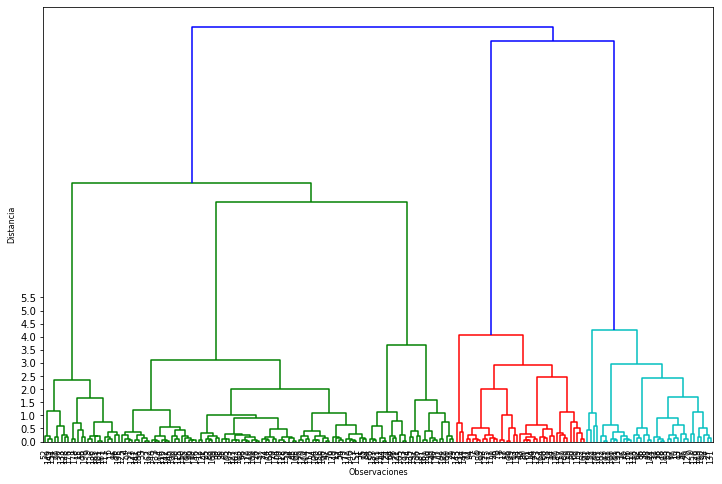

In [5]:
# Se aplica el codigo y la estrcutura vista en clase para la construcción del dendograma con diustancia euclidiana y enlace ward.

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

dist = pdist(nuevo_df_escalado, metric='euclidean')
Z = linkage(dist, method='ward')

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

fig, ax = plt.subplots(figsize=(12, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=8, ax=ax)
ax.set_xlabel('Observaciones', fontsize=8)
ax.set_yticks(np.arange(0, 6, 0.5))
ax.set_ylabel('Distancia', fontsize=8)
plt.show()

#### 3.2. Número de clusters

Retenga el número de clusters que se obtengan luego de fijar la distancia en 6.

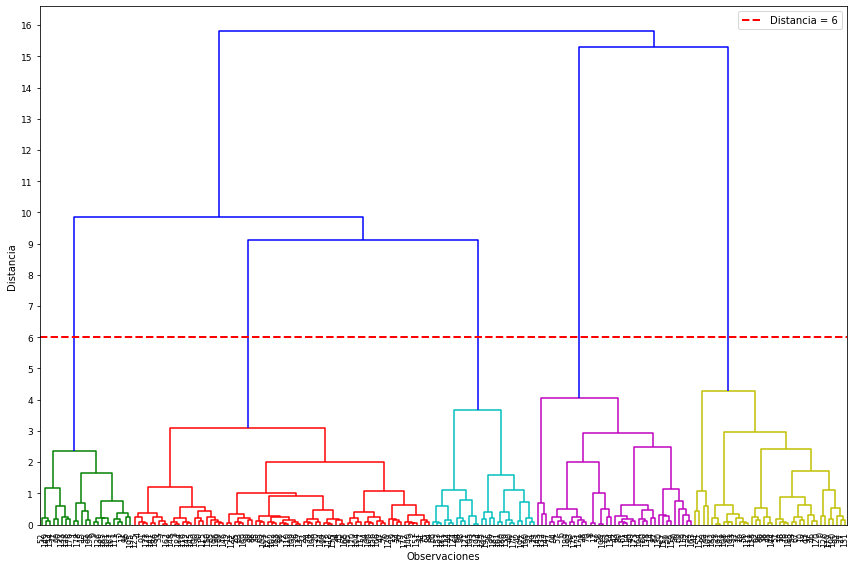

Número de clusters obtenidos con distancia = 6: 5

Distribución de observaciones por cluster:
1    23
2    74
3    26
4    39
5    38
dtype: int64


In [6]:
# Utilice este espacio para escribir el código.

from scipy.cluster.hierarchy import linkage, fcluster

# Se visualiza el dendrograma obtenido en el punto anterior marcando con línea de corte en distancia = 6
fig, ax = plt.subplots(figsize=(12, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=10, ax=ax, color_threshold=6)
ax.axhline(y=6, color='r', linestyle='--', linewidth=2, label='Distancia = 6')

# Se ajustar el tamaño de fuente de los ejes
ax.set_xlabel('Observaciones', fontsize=10)
ax.set_ylabel('Distancia', fontsize=10)
ax.set_yticks(np.arange(0, max(Z[:, 2]) + 1, 1.0))  # Ajustar ticks según el rango de distancias
ax.tick_params(axis='y', labelsize=9)
ax.tick_params(axis='x', labelsize=8)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

# Se obtiene los clusters con distancia de corte = 6
clusters = fcluster(Z, t=6, criterion='distance')

# Se cuenta el número de clusters únicos
num_clusters = len(np.unique(clusters))
print(f"Número de clusters obtenidos con distancia = 6: {num_clusters}")

# Se muestra la distribución de las observaciones por los cluster resultantes
cluster_counts = pd.Series(clusters).value_counts().sort_index()
print("\nDistribución de observaciones por cluster:")
print(cluster_counts)


#### 3.3. Algoritmo Jerárquico Aglomerativo

Utilizando el número de clusters encontrados en el paso anterior, aplique el algoritmo jerárquico aglomerativo, utilizando el enlace 'ward' y la distancia euclidiana. Describa los grupos encontrados, en que grupo o grupos concentraría su estrategia de marketing y por qué?

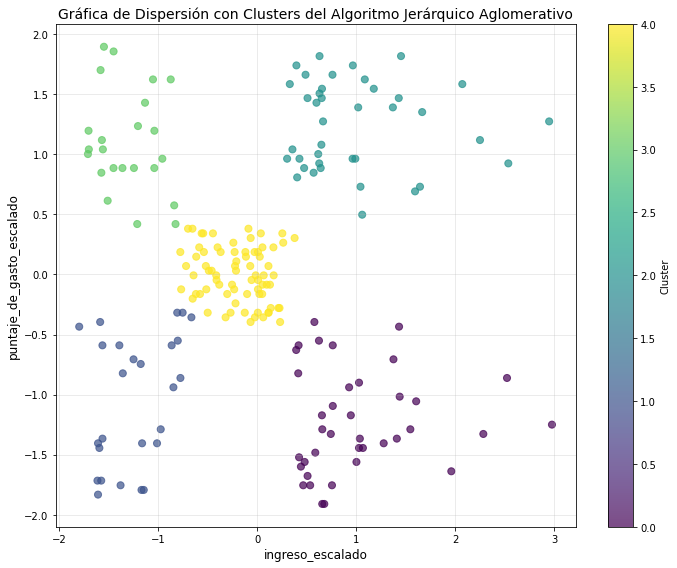

In [7]:
# Utilice este espacio para escribir el código.

# Se aplica el codigo y la estrcutura vista en clase para la construcción del Algoritmo Jerárquico Aglomerativo con diustancia euclidiana y enlace ward.

from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X = nuevo_df_escalado

cluster_sk = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
# Nota para quienes estén usando la versión 1.4., la opción affinity fue renombrada a metric
cluster_sk = cluster_sk.fit_predict(X)

# Gráfica de dispersión con los clusters obtenidos del Algoritmo Jerárquico Aglomerativo
plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], 
            c=cluster_sk, cmap='viridis', s=50, alpha=0.7)
plt.title('Gráfica de Dispersión con Clusters del Algoritmo Jerárquico Aglomerativo', fontsize=14)
plt.xlabel(nuevo_df_escalado.columns[0], fontsize=12)
plt.ylabel(nuevo_df_escalado.columns[1], fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


(Utilice este espacio para describir su procedimiento)

Como conclusión de este punto, la estandarización de variables es clave para evitar el sesgo por la marcada diferencia de escala entre ingresos y puntajes de gasto. El dendrograma construido con enlace ward y distancia euclidiana mostró una estructura diferenciada de agrupamiento. Al fijar una distancia de corte en 6, se identifican 5 clusters. 

El algoritmo aglomerativo confirmó esta estructura, mostrando grupos bien diferenciados en la gráfica de dispersión. Los clusters con mayores ingresos y altos puntajes de gasto (por ejemplo, cluster 2) serían ideales para estrategias de marketing mas personalizadas, mientras que los clusters con bajos ingresos pero alto gasto (cluster 5) podrían responder merjo a estrategías de promociones masivas para incentivar el acceso y pensar en iniciar esquemas que incentiven la fidelización.

### 4. DBSCAN

Implemente DBSCAN, al igual que el punto anterior sólo dos variables: su ingreso y el puntaje de gastos. Al implementar  justifique su elección de `min_samples` y `eps`. ¿Cuántos grupos o clusters encuentra? ¿Cuáles son su características? ¿Cambiaría su estrategia de marketing respecto al punto anterior? Justifique su respuesta.

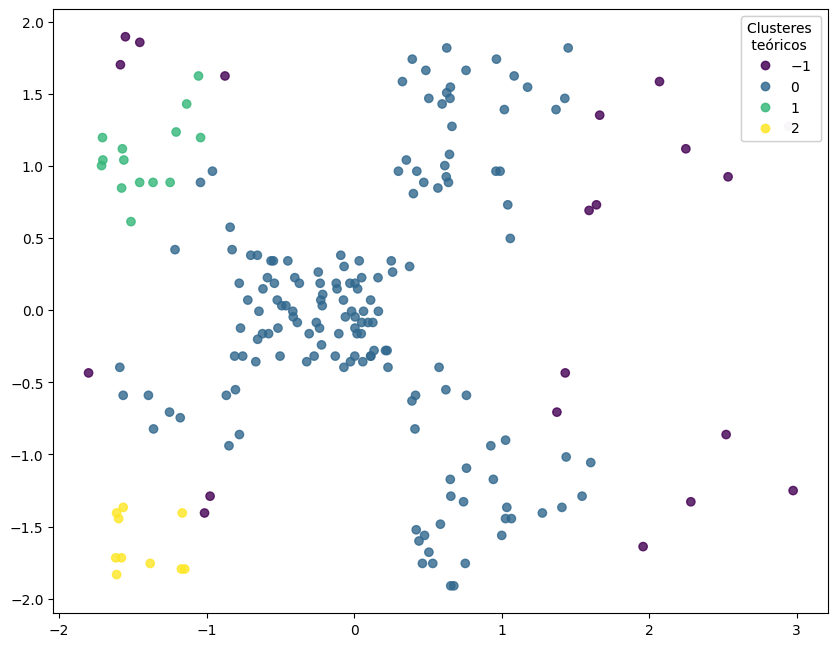

In [8]:
# Utilice este espacio para escribir el código.

# Se aplica el codigo y la estrcutura vista en clase para la construcción del DBSCAN incialmente con un eps de 5 y min_samples de 10.

#Cargamos las librerías a utilizar
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

db = DBSCAN(eps=0.5, min_samples=10)
clusters=db.fit_predict(X)

fig, ax = plt.subplots(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
g = plt.scatter(X.iloc[:,0], X.iloc[:,1], c = clusters, alpha = 0.8)
legend = ax.legend(*g.legend_elements(), loc = "upper right", title = "Clusteres \n teóricos")
ax.add_artist(legend)
plt.show()


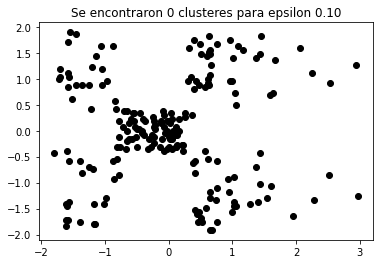

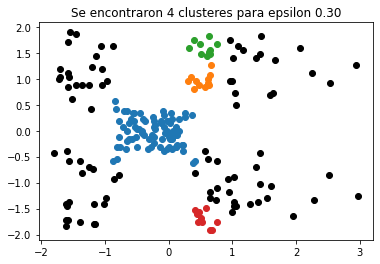

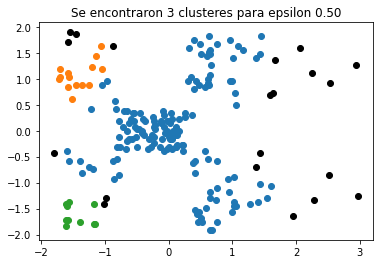

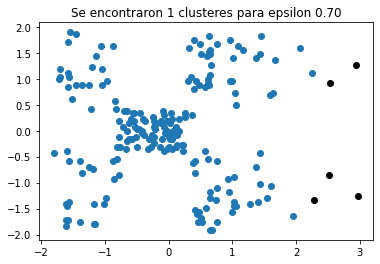

In [9]:

# Se aplica el codigo y la estrcutura vista en clase para la elección de eps, probando y graficando el resultado para 0.1, 0.3, 0.5 y 0.7

for e in [0.1, 0.3, 0.5, 0.7]:
    db = DBSCAN(eps = e, min_samples = 10).fit(X)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
    resultado = pd.DataFrame(X).assign(Cluster = clusteres)
    plt.figure()
    
    col_x = resultado.columns[0]  # Primera columna
    col_y = resultado.columns[1]  # Segunda columna
        
    for k in np.unique(clusteres):
        if k != -1:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, col_x], 
                y = resultado.loc[resultado.Cluster == k, col_y]
                )
        else:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, col_x], 
                y = resultado.loc[resultado.Cluster == k, col_y],
                c = "black"
                )
    plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, e))

0.4934968313866966


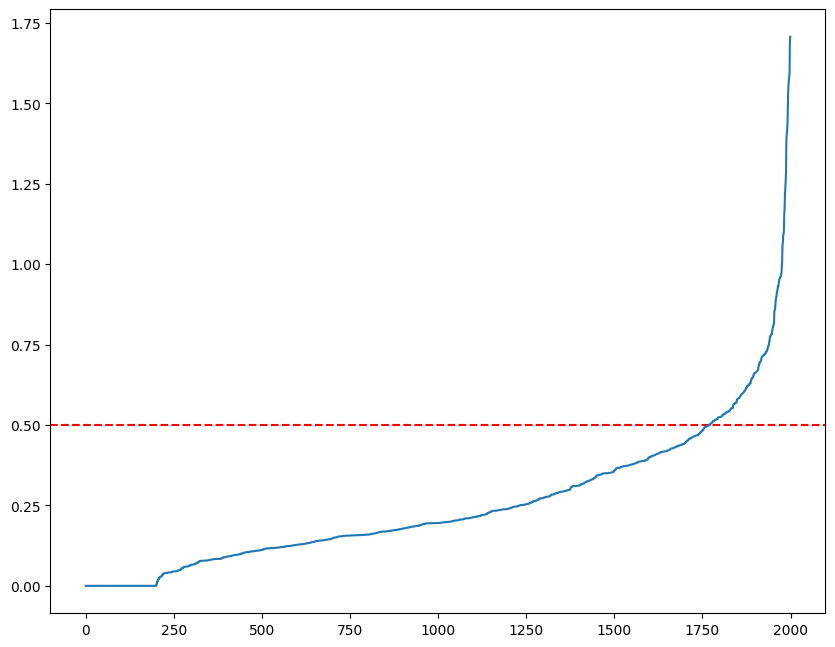

In [10]:
# Se aplica el codigo y la estrcutura vista en clase para evaluar el DBSCAN con varios niveles de eps buscando encontrar el "codo" 

# Cargamos NeighborsNeighbors
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(X)
distancias, indices = nbrs.kneighbors(X)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 0.5, color = 'r', linestyle = '--')
plt.plot(distancias)

from kneed import KneeLocator

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])


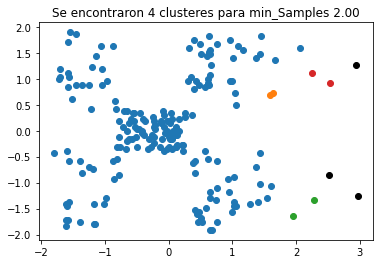

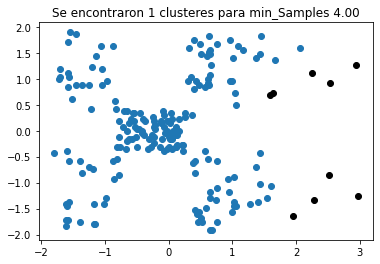

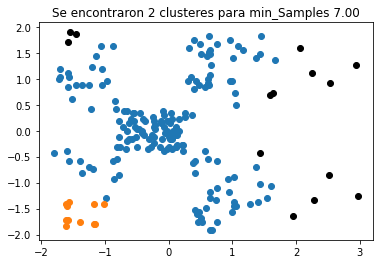

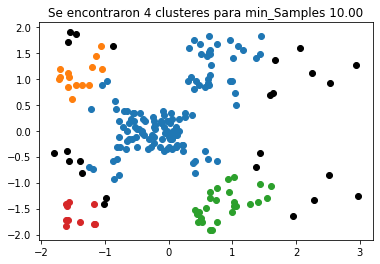

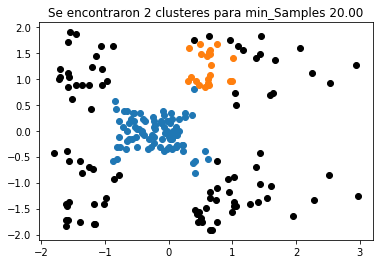

In [11]:
# # Se aplica el codigo y la estrcutura vista en clase para la elección de min_samples

for minpts in [2, 4, 7, 10, 20]:
    db = DBSCAN(eps = .49, min_samples = minpts).fit(X)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
    resultado = pd.DataFrame(X).assign(Cluster = clusteres)
    plt.figure()
    
    col_x = resultado.columns[0]  # Primera columna
    col_y = resultado.columns[1]  # Segunda columna
    
    for k in np.unique(clusteres):
        if k != -1:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, col_x], 
                y = resultado.loc[resultado.Cluster == k, col_y]
                )
        else:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, col_x], 
                y = resultado.loc[resultado.Cluster == k, col_y],
                c = "black"
                )
    plt.title('Se encontraron %d clusteres para min_Samples %0.2f' % (n_clusteres, minpts))


(Utilice este espacio para describir su procedimiento)

La elección de eps se basó en el método del codo visto en clase, identificando un valor óptimo alrededor de 0.49. Para min_samples se utilizó el codigo visto en el taller de la clase para mirar el resultado con varios valores (2, 4, 7, 10 y 20), dando mejores resutaldos con el paramtero 10, que presentaría un mayor balance y detección de ruido. DBSCAN identificó entre 3 y 4 clusters dependiendo de los parámetros, mostrando una segmentación más natural a los datos y al parecer menos forzada que el método jerárquico. Los clusters obtenidos fueron consistentes con los hallazgos iniciales, reforzando la segmentación entre grupos de alto ingreso y puntaje de gasto, otros de bajo ingreso y alto gasto, y otros perfiles más moderados. La presencia de puntos de ruido (outliers) sugiere que existen clientes atípicos que merecen un análisis aparte. Esta metodología refuerza la estrategia de marketing al identificar grupos naturales y outliers potencialmente valiosos para estudiar.


### 5. Incorporando más dimensiones

Hasta este momento hemos utilizado solo dos variables para nuestro análisis, sin embargo, la base cuenta con otras variables más: género y edad. Usando las categorías de edad creadas anteriormente incorpore género y grupo etario a su análisis. Genere los grupos utilizando DBSCAN y la distancia de Gower, justificando su elección de `min_samples` y `eps`   ¿Incorporar estas variables, ayuda a la focalización de la estrategia de marketing?

In [7]:
# Utilice este espacio para escribir el código.

In [12]:
from sklearn.preprocessing import LabelEncoder

# Se preparan los datos incluyendo las nuevas variables para transformar y codificar las categóricas
df_cluster = df[['Ingreso', 'Puntaje_Gasto', 'Genero', 'Grupo_Etario']].copy()

# Se codifcan las variables categóricas
le_genero = LabelEncoder()
le_etario = LabelEncoder()

df_cluster['Genero_encoded'] = le_genero.fit_transform(df_cluster['Genero'])
df_cluster['Grupo_Etario_encoded'] = le_etario.fit_transform(df_cluster['Grupo_Etario'])

# Se seleccion el df solo con las variables codificadas para estandarizar
X = df_cluster[['Ingreso', 'Puntaje_Gasto', 'Genero_encoded', 'Grupo_Etario_encoded']].copy()

# Se estandariza cada variable
from sklearn.preprocessing import StandardScaler

# Inicializa el scaler
scaler = StandardScaler()

# Estandariza las variables numéricas (Ingreso y Puntaje_Gasto)
X[['Ingreso', 'Puntaje_Gasto', 'Genero_encoded', 'Grupo_Etario_encoded']] = scaler.fit_transform(X[['Ingreso', 'Puntaje_Gasto', 'Genero_encoded', 'Grupo_Etario_encoded']])



In [13]:
# Se consulta la inteligencia articial para encontrar el código requerido para aplicar en DBSCAN y la distancia de Gower
# Se calcula inicialmente la matriz de distancia de Gower para el df de las variables codificadas y estandarizadas.

from gower import gower_matrix

gower_dist = gower_matrix(X)

gower_dist

array([[0.        , 0.31702387, 0.26722494, ..., 0.4081106 , 0.28523773,
        0.11495142],
       [0.31702387, 0.        , 0.34979892, ..., 0.4747602 , 0.03178613,
        0.20207244],
       [0.26722494, 0.34979892, 0.        , ..., 0.5225183 , 0.31801277,
        0.25431433],
       ...,
       [0.4081106 , 0.4747602 , 0.5225183 , ..., 0.        , 0.45552593,
        0.47683263],
       [0.28523773, 0.03178613, 0.31801277, ..., 0.45552593, 0.        ,
        0.22130671],
       [0.11495142, 0.20207244, 0.25431433, ..., 0.47683263, 0.22130671,
        0.        ]], dtype=float32)

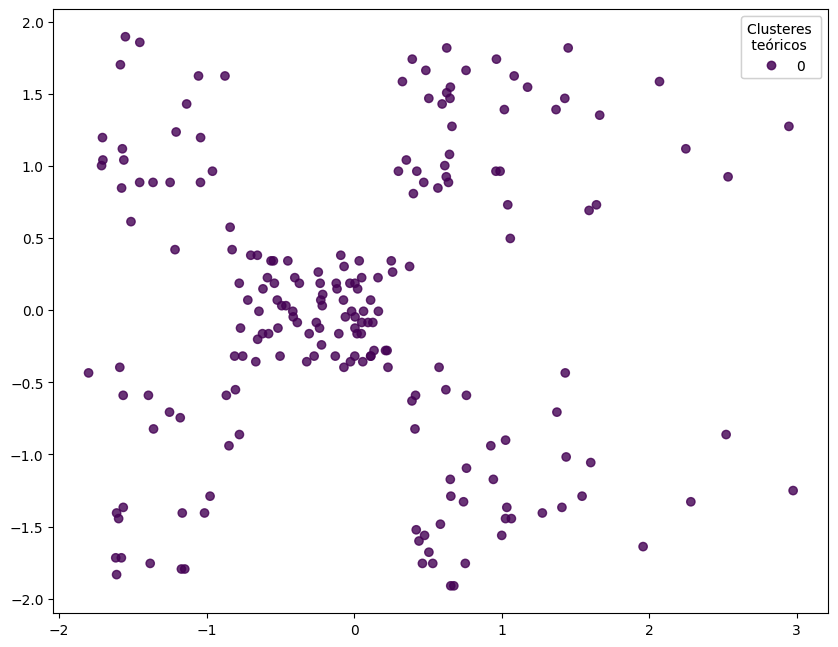

In [14]:
#Cargamos las librerías a utilizar
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# La solución propuesta por la inteligencia artificial es calcular la matriz de distancias utilizando la distancia de Gower y luego pasar esta matriz a DBSCAN utilizando el parámetro metric='precomputed'.
db = DBSCAN(eps=0.5, min_samples=10, metric='precomputed')
clusters=db.fit_predict(gower_dist)

fig, ax = plt.subplots(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
g = plt.scatter(X.iloc[:,0], X.iloc[:,1], c = clusters, alpha = 0.8)
legend = ax.legend(*g.legend_elements(), loc = "upper right", title = "Clusteres \n teóricos")
ax.add_artist(legend)
plt.show()

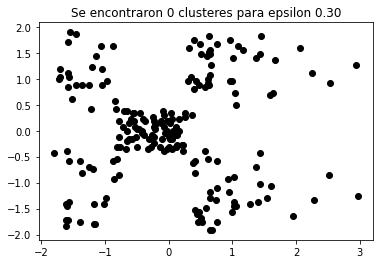

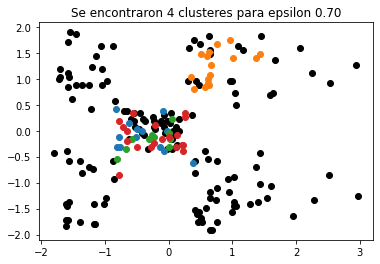

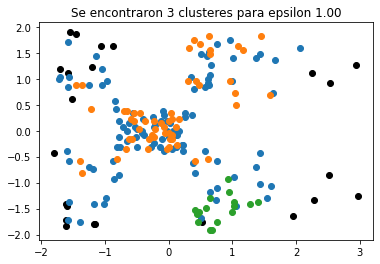

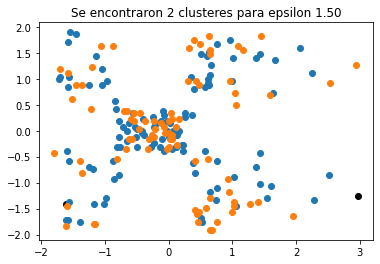

In [15]:
# # Se aplica el codigo y la estrcutura vista en clase para la elección de eps

for e in [0.3, 0.7, 1, 1.5]:
    db = DBSCAN(eps = e, min_samples = 10).fit(X)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
    resultado = pd.DataFrame(X).assign(Cluster = clusteres)
    plt.figure()
    
    col_x = resultado.columns[0]  # Primera columna
    col_y = resultado.columns[1]  # Segunda columna
        
    for k in np.unique(clusteres):
        if k != -1:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, col_x], 
                y = resultado.loc[resultado.Cluster == k, col_y]
                )
        else:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, col_x], 
                y = resultado.loc[resultado.Cluster == k, col_y],
                c = "black"
                )
    plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, e))

0.9675338789765144


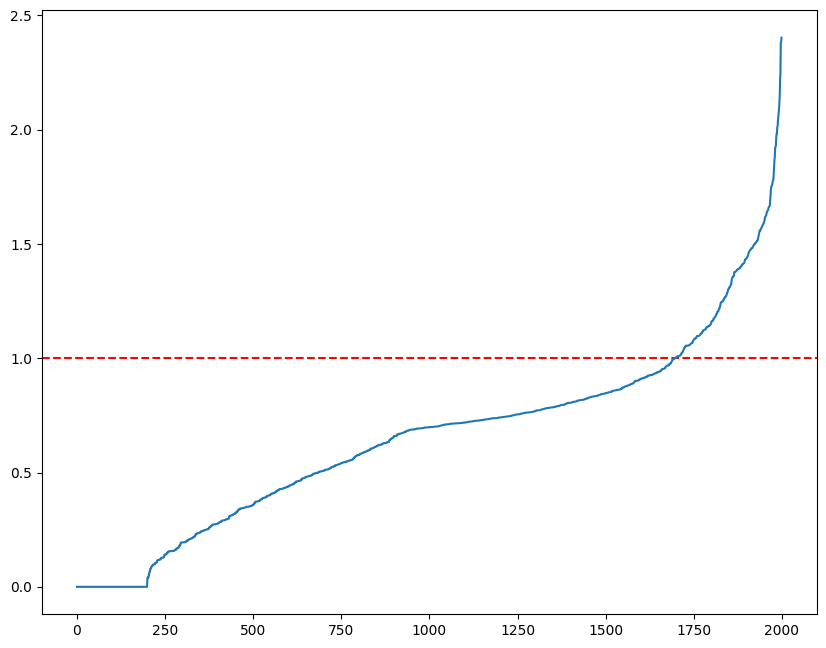

In [74]:
# # Se aplica el codigo y la estrcutura vista en clase para encontrar con el método del "codo" el mejor eps

# Cargamos NeighborsNeighbors
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(X)
distancias, indices = nbrs.kneighbors(X)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.plot(distancias)

from kneed import KneeLocator

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])

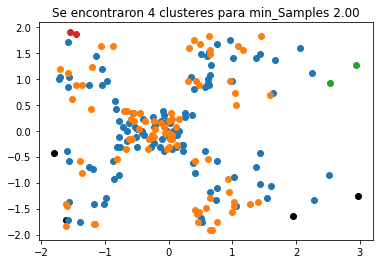

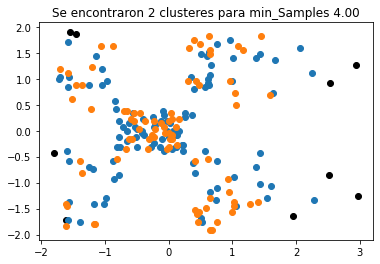

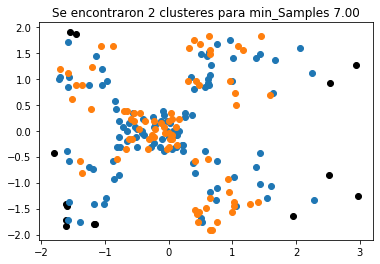

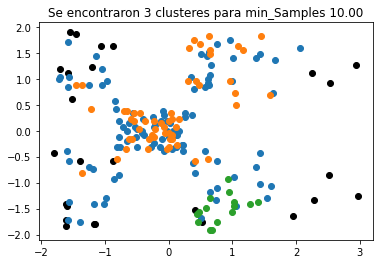

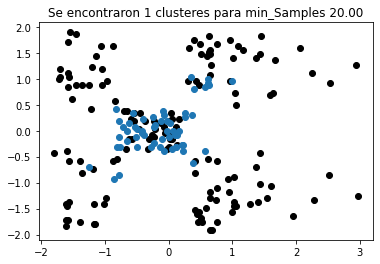

In [16]:
# # Se aplica el codigo y la estrcutura vista en clase para la elección de min_samples

for minpts in [2, 4, 7, 10, 20]:
    db = DBSCAN(eps = 0.96, min_samples = minpts).fit(X)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
    resultado = pd.DataFrame(X).assign(Cluster = clusteres)
    plt.figure()
    
    col_x = resultado.columns[0]  # Primera columna
    col_y = resultado.columns[1]  # Segunda columna
    
    for k in np.unique(clusteres):
        if k != -1:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, col_x], 
                y = resultado.loc[resultado.Cluster == k, col_y]
                )
        else:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, col_x], 
                y = resultado.loc[resultado.Cluster == k, col_y],
                c = "black"
                )
    plt.title('Se encontraron %d clusteres para min_Samples %0.2f' % (n_clusteres, minpts))


(Utilice este espacio para describir su procedimiento)

Se utilizó la inteligencia artificial para encontrar la forma de calcular la matriz de distancias de Gower y pasarla como parámetro al análisis de cluster por DBSCAN.

Como resultado se tienen las siguientes conclusiones, al incluir género y grupo etario mediante la distancia de Gower, se mejora la segmentación al considerar variables categóricas y numéricas de forma integrada. La elección de eps de 0.96 y min_samples de 10 permite identificar clusters con más información y más relevantes para implementar estrategias de marketing. Los resultados muestran que la incorporación de estas variables podria mejorar la focalización, ya que los clusters ahora reflejan no solo similitudes socioeconómicas, sino también demográficas. Esto permite diseñar campañas más personalizadas, como targeting por edad y género dentro de grupos de mismo perfil de gasto, aumentando la efectividad de las estrategias de mercadeo.
